In [1]:
%matplotlib notebook
import matplotlib
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt
from datetime import datetime

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurements', 'stations']

In [8]:
# Save references to each table
measurements = Base.classes.measurements
Station = Base.classes.stations

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [10]:
last_date = session.query(measurements.date).order_by(measurements.date.desc()).first()
year_ago = dt.date(2017, 8, 23) - dt.timedelta(days=365)
year_ago

datetime.date(2016, 8, 23)

In [11]:
# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date
prcp_scores = session.query(measurements.date,func.avg(measurements.prcp)).\
                    filter(measurements.date>=year_ago).\
                    group_by(measurements.date).all()
prcp_scores

[('2016-08-23', 0.3871428571428571),
 ('2016-08-24', 1.3328571428571425),
 ('2016-08-25', 0.07714285714285715),
 ('2016-08-26', 0.016666666666666666),
 ('2016-08-27', 0.05333333333333332),
 ('2016-08-28', 0.5166666666666665),
 ('2016-08-29', 0.20857142857142857),
 ('2016-08-30', 0.011666666666666667),
 ('2016-08-31', 0.45428571428571424),
 ('2016-09-01', 0.005),
 ('2016-09-02', 0.03571428571428571),
 ('2016-09-03', 0.254),
 ('2016-09-04', 0.27599999999999997),
 ('2016-09-05', 0.05666666666666667),
 ('2016-09-06', 0.20499999999999996),
 ('2016-09-07', 0.3333333333333333),
 ('2016-09-08', 0.06571428571428573),
 ('2016-09-09', 0.15285714285714283),
 ('2016-09-10', 0.27999999999999997),
 ('2016-09-11', 0.25),
 ('2016-09-12', 0.22),
 ('2016-09-13', 0.3871428571428571),
 ('2016-09-14', 2.04),
 ('2016-09-15', 0.7085714285714285),
 ('2016-09-16', 0.11714285714285716),
 ('2016-09-17', 0.136),
 ('2016-09-18', 0.10600000000000001),
 ('2016-09-19', 0.04571428571428572),
 ('2016-09-20', 0.147142857

In [12]:
#Create DataFrame
prcp_df = pd.DataFrame(prcp_scores, columns = ['Date', 'prcp'])
prcp_df.set_index('Date' , inplace=True)
prcp_df.head()

,prcp
Date,
2016-08-23,0.387143
2016-08-24,1.332857
2016-08-25,0.077143
2016-08-26,0.016667
2016-08-27,0.053333


In [13]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
sel_min_avg_max = [measurements.station,
                  func.min(measurements.tobs),
                  func.max(measurements.tobs),
                  func.avg(measurements.tobs)]
most_active_station = session.query(*sel_min_avg_max).order_by(func.count(measurements.tobs).desc()).first()
most_active_station

('USC00519397', 53, 87, 73.09795396419437)

<IPython.core.display.Javascript object>


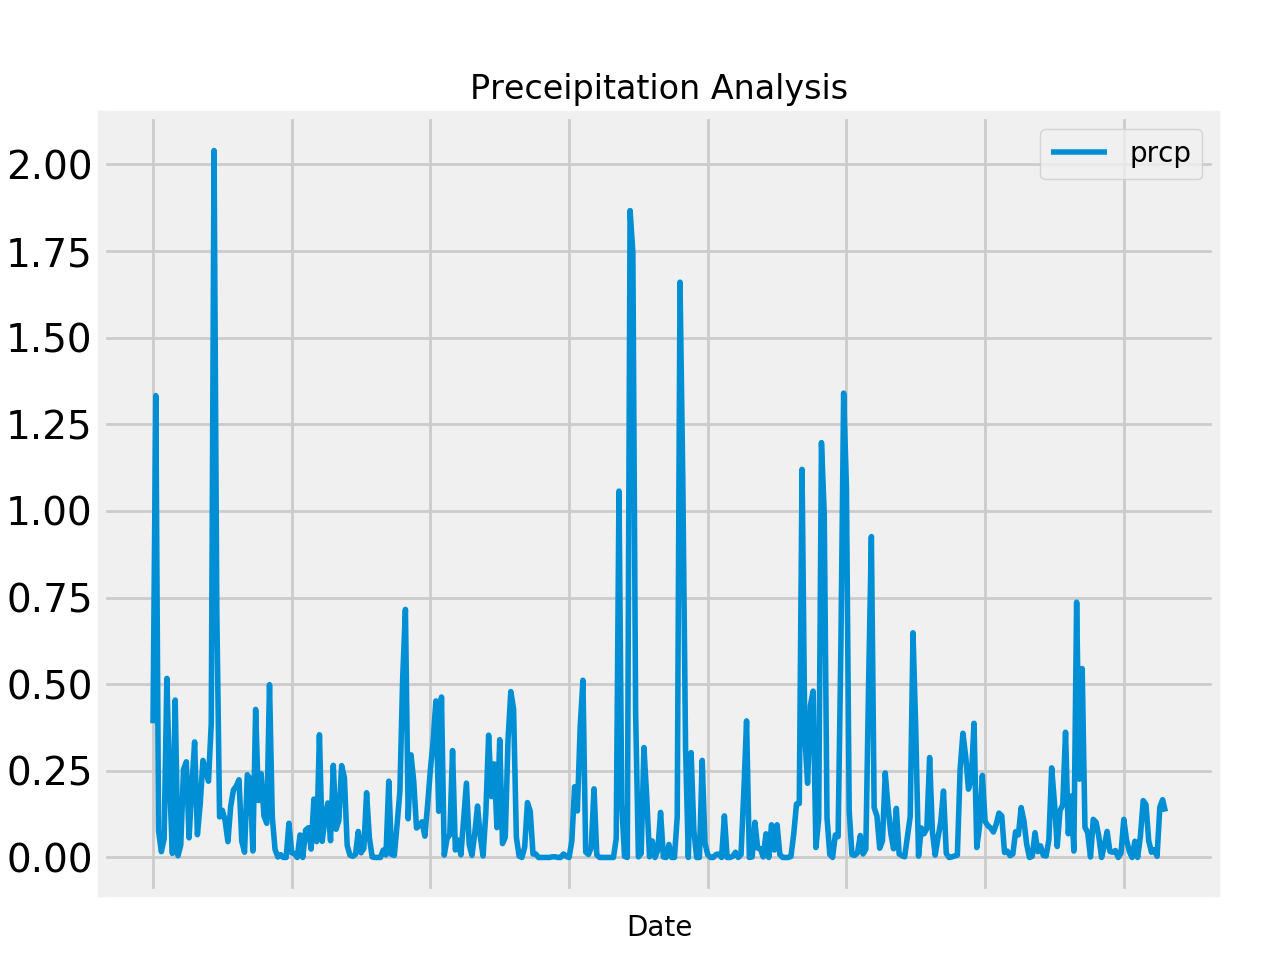

In [14]:
#plot the above Data frame
#%matplotlib inline
prcp_df.plot(kind='line', linewidth=2)
plt.legend(bbox_to_anchor=(1,1),fontsize=10)
#plt.legend('Precepitation',bbox_to_anchor=(0.5,1),fontsize=2)
plt.title("Preceipitation Analysis", size=12)
plt.xlabel('Date',size=10)
plt.ylabel('Preceipitation',size=10)
plt.savefig('images/Preceipitation Analysis.png')
plt.show()

In [15]:
#Use Pandas to print the summary statistics for the precipitation data.
prcp_df.describe()

,prcp
count,366.000000
mean,0.156734
std,0.275544
min,0.000000
25%,0.008571
50%,0.065357
75%,0.176786
max,2.040000


In [16]:
# What are the most active stations?
# List the stations and the counts in descending order.

active_stations = session.query(measurements.station, func.count(measurements.station)).\
            group_by(measurements.station).\
            order_by(func.count(measurements.station).desc()).all()
active_stations

[('USC00519281', 8316),
 ('USC00519397', 8172),
 ('USC00513117', 8127),
 ('USC00519523', 8007),
 ('USC00516128', 7836),
 ('USC00514830', 6606),
 ('USC00511918', 5937),
 ('USC00517948', 4116),
 ('USC00518838', 1533)]

In [17]:
# How many stations are available in this dataset?
#session.query(func.count(Station.station)).all()
session.query(Station.name).count()

27

In [18]:
active_stations[0][0]

'USC00519281'

In [19]:
year_ago = dt.date(2017,8,23)-dt.timedelta(days=365)
year_ago 

datetime.date(2016, 8, 23)

In [20]:
High_temp_station = session.query(func.min(measurements.tobs), 
                                  func.max(measurements.tobs), 
                                  func.avg(measurements.tobs)).\
                    filter(measurements.station == active_stations[0][0]).all()
High_temp_station

[(54, 85, 71.66378066378067)]

In [21]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
one_yr_tobs = session.query(measurements.tobs).\
    filter(measurements.station == active_stations[0][0]).\
    filter(measurements.date >= year_ago).all()

bins_df = pd.DataFrame(one_yr_tobs, columns=['tobs'])
bins_df.head()

,tobs
0,77
1,77
2,80
3,80
4,75


<IPython.core.display.Javascript object>


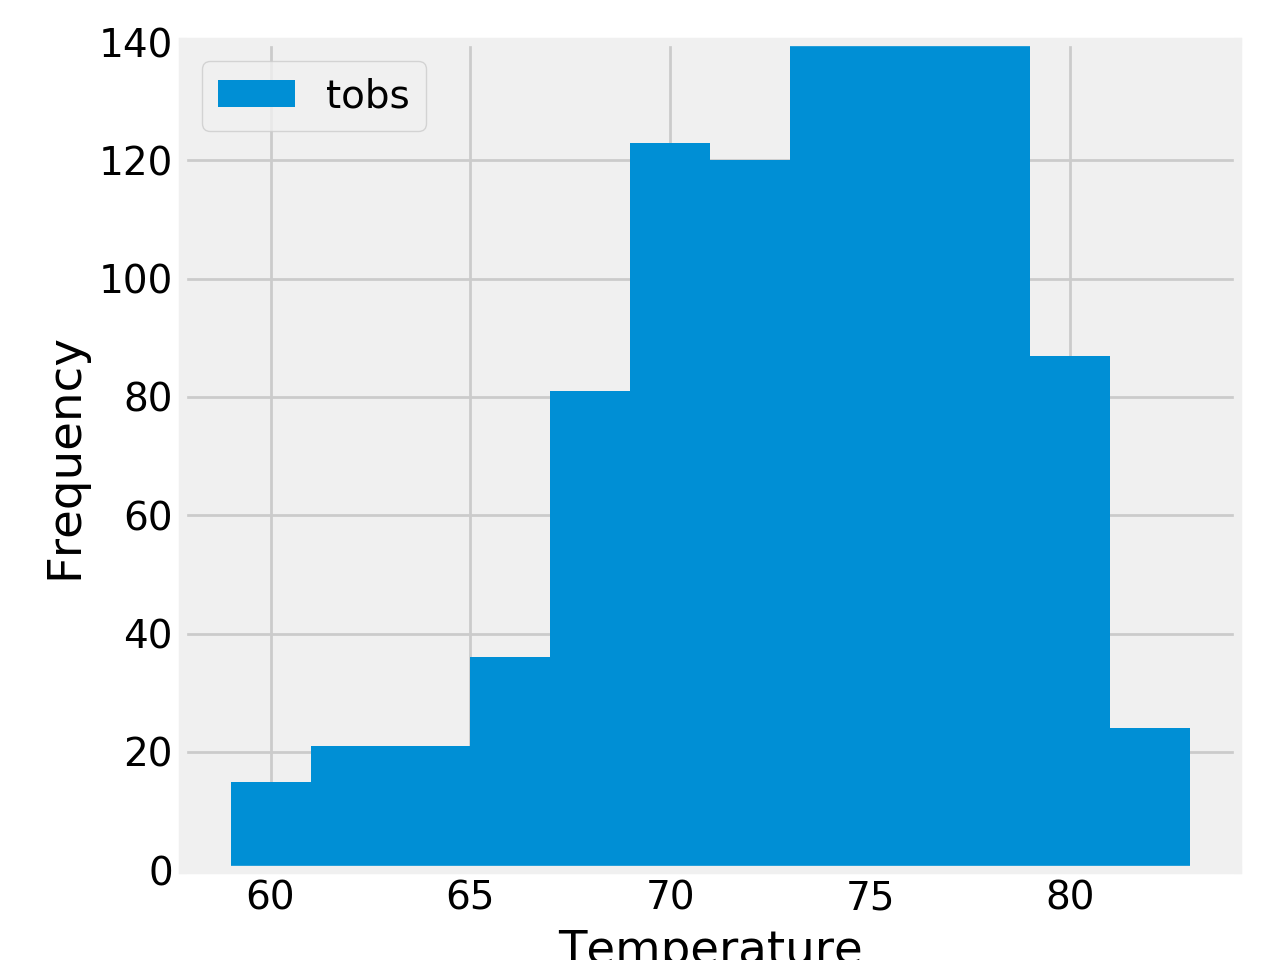

In [22]:
#%matplotlib inline
bins_df.plot.hist(bins=12)
plt.tight_layout()
title = "Temperature observations using histogram"
#plt.title("Temperature observations using histogram")
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.ylim(0,140)
plt.show()
plt.savefig("images/Temperature.png")

# plt.grid()
# plt.title("Temperature Observations for Station " + bins_df, fontsize=20)
# plt.xlabel("Temperature Reported", fontsize=16)
# plt.legend(bbox_to_anchor=(1,1), fontsize=16)
# plt.savefig("Output/StationTemps.png")
# plt.show


In [23]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
#def calc_temps(start_date, end_date):
#     sel = session.query(measurements.tobs).filter(measurements.date>=start_date, measurements.date<=end_date).all()
#     temp = [temp for temp in sel]
#     TAVG = np.mean(temp)
#     TMIN = min(temp)
#     TMAX = max(temp)

def calc_temps(start_date, end_date):
    c_results = session.query(func.min(measurements.tobs), func.avg(measurements.tobs), func.max(measurements.tobs)).\
                    filter(measurements.date >= start_date).\
                    filter(measurements.date <= end_date).all()
    return c_results
    calc_temps('2017-01-01', '2017-12-31')

    """TMIN, TAVG, and TMAX for a list of dates.
   
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
#     return session.query(func.min(measurements.tobs), func.avg(measurements.tobs), func.max(measurements.tobs)).\
#         filter(measurements.date >= start_date).filter(measurements.date <= end_date).all()
# print(calc_temps('2017-8-28', '2017-9-05'))

In [24]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
results = calc_temps('2017-07-01', '2017-07-08')
results

[(71, 78.04347826086956, 87)]

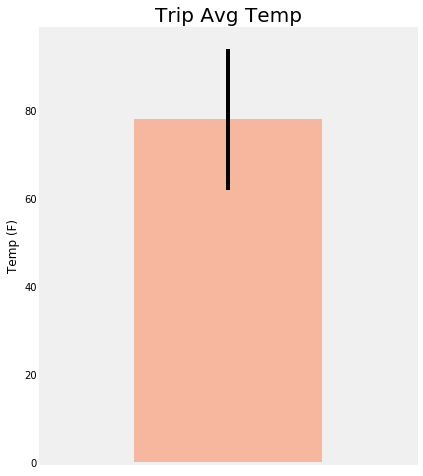

In [25]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

%matplotlib inline
trip_df = pd.DataFrame(results, columns=['Min Temp', 'Avg Temp', 'Max Temp'])
avg_temp = trip_df['Avg Temp']
min_max_temp = trip_df.iloc[0]['Max Temp'] - trip_df.iloc[0]['Min Temp']
avg_temp.plot(kind='bar', yerr=min_max_temp, figsize=(6,8), alpha=0.5, color='coral')
plt.title("Trip Avg Temp", fontsize=20)
plt.ylabel("Temp (F)")
plt.xticks([])
plt.grid()
plt.savefig("images/TripTempSummary.png")
plt.show()

In [26]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

sel = [measurements.station,Station.name,Station.latitude,Station.longitude,Station.elevation,func.avg(measurements.prcp)]
results = session.query(*sel).\
filter(measurements.date < "2017-07-06").\
filter(measurements.date > "2016-06-30").\
group_by(measurements.station).\
order_by(func.avg(measurements.prcp).desc()).all()

print(results)

[('USC00516128', 'MANOA LYON ARBO 785.2, HI US', '21.3331', '-157.8025', '152.4', 0.4767142857143045), ('USC00519281', 'MANOA LYON ARBO 785.2, HI US', '21.3331', '-157.8025', '152.4', 0.25129729729731887), ('USC00513117', 'MANOA LYON ARBO 785.2, HI US', '21.3331', '-157.8025', '152.4', 0.17094594594596133), ('USC00519523', 'MANOA LYON ARBO 785.2, HI US', '21.3331', '-157.8025', '152.4', 0.1325072886297431), ('USC00514830', 'MANOA LYON ARBO 785.2, HI US', '21.3331', '-157.8025', '152.4', 0.11392026578073387), ('USC00519397', 'MANOA LYON ARBO 785.2, HI US', '21.3331', '-157.8025', '152.4', 0.06307065217390832), ('USC00517948', 'MANOA LYON ARBO 785.2, HI US', '21.3331', '-157.8025', '152.4', 0.026482412060301306)]


## Optional Challenge Assignment

In [27]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(measurements.tobs), func.avg(measurements.tobs), func.max(measurements.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", measurements.date) == date).all()
    
daily_normals("01-01")

[(62, 69.15384615384616, 77)]

In [39]:
# calculate the daily normals for your trip

# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip
# Use the start and end date to create a range of dates


# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date

start_date = "2017-07-01";
end_date = "2017-07-10"
trip_temp = calc_temps(start_date,end_date)
trip_temp_df = pd.DataFrame(trip_temp,columns = ['Max-Temp','Min-Temp','Mean-Temp'])
# trip_temp_df['Date'] = trip_temp_df['Date'].dt.date
# trip_temp_df =trip_temp_df.set_index('Date')
trip_temp_df
                            

,Max-Temp,Min-Temp,Mean-Temp
0,69,78.152542,87
